In [1]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 25.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [3]:
url_df_combined = 'df_combined.csv'

In [4]:
df_combined = pd.read_csv(url_df_combined)
df_combined.sample(10)

,year,boyfriend_girlfriend,spouse,ex_spouse,homosexual_relationship,state,state_abbrv,domestic_violence,handgun,rape,abuse,sexual_violence,dv_total,search_total,pop_category
120,2016,768,237,51,15,Vermont,VT,5.5,4.5,29.5,24.5,0.0,1071,64.0,low_pop
4,2008,8167,6218,1417,256,Texas,TX,4.0,9.5,24.0,23.5,0.0,16058,61.0,high_pop
87,2019,21298,9510,1589,228,Michigan,MI,4.0,4.0,16.0,18.5,0.0,32625,42.5,high_cri
115,2011,817,252,51,15,Vermont,VT,4.5,3.5,26.5,28.5,0.0,1135,63.0,low_pop
107,2021,28768,9865,1413,0,Tennessee,TN,4.0,5.5,15.0,16.5,0.0,40046,41.0,high_cri
123,2019,809,289,91,6,Vermont,VT,5.0,5.0,17.5,25.5,0.0,1195,53.0,low_pop
79,2011,22169,11396,1862,792,Michigan,MI,4.5,5.5,24.0,24.5,0.0,36219,58.5,high_cri
109,2005,649,294,56,13,Vermont,VT,0.0,0.0,16.5,48.5,0.0,1012,65.0,low_pop
89,2021,26918,10361,1979,0,Michigan,MI,4.0,4.0,14.0,16.0,0.0,39258,38.0,high_cri
81,2013,20055,9836,1495,883,Michigan,MI,4.0,6.0,32.0,21.0,0.0,32269,63.0,high_cri


In [5]:
df_combined['state'].unique()

array(['Texas', 'Illinois', 'North Dakota', 'Minnesota', 'Michigan',
       'Tennessee', 'Vermont'], dtype=object)

In [6]:
df_combined.columns

Index(['year', 'boyfriend_girlfriend', 'spouse', 'ex_spouse',
       'homosexual_relationship', 'state', 'state_abbrv', 'domestic_violence',
       'handgun', 'rape', 'abuse', 'sexual_violence', 'dv_total',
       'search_total', 'pop_category'],
      dtype='object')

In [7]:
url_states_population = 'US_States_Population-Wikipedia.xlsx'
states_population = pd.read_excel(url_states_population, 1)
states_population.sample(10)

,State/federal district/territory/\ndivision/region,#,2020 pop.,#.1,2010 pop.,#.2,2000 pop.,#.3,2010–\n2020\nchange,Geo.\nsort
29,Oklahoma,28,3959353,28,3751351,27,3450654,26,0.055,WSC
22,Tennessee,16,6910840,17,6346105,16,5689283,17,0.089,ESC
60,Hawaii,40,1455271,40,1360301,42,1211537,23,0.07,Pac
56,Mountain,6,24919150,6,22065451,7,18172295,1,0.129,West
70,U.S. Minor Outlying Islands,6,[note 1],6,[note 2],6,316,6,—,I.A.
16,Maryland,18,6177224,19,5773552,19,5296486,22,0.07,SAtl
54,Montana,44,1084225,44,989415,44,902195,14,0.096,Mtn
51,Nevada,32,3104614,35,2700551,35,1998257,5,0.15,Mtn
24,Kentucky,26,4505836,26,4339367,25,4041769,33,0.038,ESC
12,Florida,3,21538187,4,18801310,4,15982378,8,0.146,SAtl


In [8]:
states_population.columns

Index(['State/federal district/territory/\ndivision/region', '#', '2020 pop.',
       '#.1', '2010 pop.', '#.2', '2000 pop.', '#.3', '2010–\n2020\nchange',
       'Geo.\nsort'],
      dtype='object')

In [22]:
states_population = states_population.rename(columns={'State/federal district/territory/\ndivision/region': 'state'}).reset_index()
states_population = states_population.drop(columns=['#', '#.1', '#.2', '#.3'])
states_population = states_population[(states_population['state'] == 'Texas') | (states_population['state'] == 'Tennessee') | (states_population['state'] == 'Michigan') | (states_population['state'] == 'Illinois') | (states_population['state'] == 'Minnesota') | (states_population['state'] == 'North Dakota') | (states_population['state'] == 'Vermont')]
states_population.sample(50)

KeyError: "['#' '#.1' '#.2' '#.3'] not found in axis"

In [27]:
states_population.head(7)

,index,state,2020 pop.,2010 pop.,2000 pop.,2010–\n2020\nchange,Geo.\nsort
0,5,Vermont,643077,625741,608827,0.028,NEng
1,22,Tennessee,6910840,6346105,5689283,0.089,ESC
2,27,Texas,29145505,25145561,20851820,0.159,WSC
3,33,Illinois,12812508,12830632,12419293,-0.001,ENC
4,35,Michigan,10077331,9883640,9938444,0.02,ENC
5,40,Minnesota,5706494,5303925,4919479,0.076,WNC
6,45,North Dakota,779094,672591,642200,0.158,WNC


In [10]:
new_dataframe = df_combined.merge(states_population, on='state', how='left')
new_dataframe

,year,boyfriend_girlfriend,spouse,ex_spouse,homosexual_relationship,state,state_abbrv,domestic_violence,handgun,rape,...,sexual_violence,dv_total,search_total,pop_category,index,2020 pop.,2010 pop.,2000 pop.,2010–\n2020\nchange,Geo.\nsort
0,2004,4151,4474,882,127,Texas,TX,4.0,8.0,27.5,...,0.0,9634,74.5,high_pop,27,29145505,25145561,20851820,0.159,WSC
1,2005,5539,6074,1232,161,Texas,TX,4.0,9.5,26.5,...,0.0,13006,69.5,high_pop,27,29145505,25145561,20851820,0.159,WSC
2,2006,7947,7791,1612,296,Texas,TX,3.0,8.5,21.5,...,0.0,17646,58.0,high_pop,27,29145505,25145561,20851820,0.159,WSC
3,2007,8275,6903,1482,271,Texas,TX,3.0,8.5,21.0,...,0.0,16931,56.5,high_pop,27,29145505,25145561,20851820,0.159,WSC
4,2008,8167,6218,1417,256,Texas,TX,4.0,9.5,24.0,...,0.0,16058,61.0,high_pop,27,29145505,25145561,20851820,0.159,WSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2017,773,256,69,6,Vermont,VT,4.0,4.0,23.5,...,0.0,1104,55.5,low_pop,5,643077,625741,608827,0.028,NEng
122,2018,816,238,95,4,Vermont,VT,5.5,4.0,20.0,...,0.0,1153,54.0,low_pop,5,643077,625741,608827,0.028,NEng
123,2019,809,289,91,6,Vermont,VT,5.0,5.0,17.5,...,0.0,1195,53.0,low_pop,5,643077,625741,608827,0.028,NEng
124,2020,720,226,71,2,Vermont,VT,3.0,6.0,18.0,...,0.0,1019,48.0,low_pop,5,643077,625741,608827,0.028,NEng


In [11]:
new_dataframe = new_dataframe.drop(columns=['index'])
new_dataframe

,year,boyfriend_girlfriend,spouse,ex_spouse,homosexual_relationship,state,state_abbrv,domestic_violence,handgun,rape,abuse,sexual_violence,dv_total,search_total,pop_category,2020 pop.,2010 pop.,2000 pop.,2010–\n2020\nchange,Geo.\nsort
0,2004,4151,4474,882,127,Texas,TX,4.0,8.0,27.5,35.0,0.0,9634,74.5,high_pop,29145505,25145561,20851820,0.159,WSC
1,2005,5539,6074,1232,161,Texas,TX,4.0,9.5,26.5,29.5,0.0,13006,69.5,high_pop,29145505,25145561,20851820,0.159,WSC
2,2006,7947,7791,1612,296,Texas,TX,3.0,8.5,21.5,25.0,0.0,17646,58.0,high_pop,29145505,25145561,20851820,0.159,WSC
3,2007,8275,6903,1482,271,Texas,TX,3.0,8.5,21.0,24.0,0.0,16931,56.5,high_pop,29145505,25145561,20851820,0.159,WSC
4,2008,8167,6218,1417,256,Texas,TX,4.0,9.5,24.0,23.5,0.0,16058,61.0,high_pop,29145505,25145561,20851820,0.159,WSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2017,773,256,69,6,Vermont,VT,4.0,4.0,23.5,24.0,0.0,1104,55.5,low_pop,643077,625741,608827,0.028,NEng
122,2018,816,238,95,4,Vermont,VT,5.5,4.0,20.0,24.5,0.0,1153,54.0,low_pop,643077,625741,608827,0.028,NEng
123,2019,809,289,91,6,Vermont,VT,5.0,5.0,17.5,25.5,0.0,1195,53.0,low_pop,643077,625741,608827,0.028,NEng
124,2020,720,226,71,2,Vermont,VT,3.0,6.0,18.0,21.0,0.0,1019,48.0,low_pop,643077,625741,608827,0.028,NEng


In [12]:
census_2000 = new_dataframe[(new_dataframe['year'] >= 2004) & (new_dataframe['year'] <= 2005)].reset_index()

census_2000['homosexual_relationship_ratio'] = census_2000['homosexual_relationship'] / census_2000['2000 pop.']
census_2000['boyfriend_girlfriend_ratio'] = census_2000['boyfriend_girlfriend'] / census_2000['2000 pop.']
census_2000['spouse_ratio'] = census_2000['spouse'] / census_2000['2000 pop.']
census_2000['ex_spouse_ratio'] = census_2000['ex_spouse'] / census_2000['2000 pop.']
census_2000['domestic_violence_ratio'] = census_2000['domestic_violence'] / census_2000['2000 pop.']
census_2000['sexual_violence_ratio'] = census_2000['sexual_violence'] / census_2000['2000 pop.']
census_2000['abuse_ratio'] = census_2000['abuse'] / census_2000['2000 pop.']
census_2000['rape_ratio'] = census_2000['rape'] / census_2000['2000 pop.']
census_2000['handgun_ratio'] = census_2000['handgun'] / census_2000['2000 pop.']
census_2000['dv_total_ratio'] = census_2000['dv_total'] / census_2000['2000 pop.']
census_2000['search_total_ratio'] = census_2000['search_total'] / census_2000['2000 pop.']
census_2000

census_2000


,index,year,boyfriend_girlfriend,spouse,ex_spouse,homosexual_relationship,state,state_abbrv,domestic_violence,handgun,...,boyfriend_girlfriend_ratio,spouse_ratio,ex_spouse_ratio,domestic_violence_ratio,sexual_violence_ratio,abuse_ratio,rape_ratio,handgun_ratio,dv_total_ratio,search_total_ratio
0,0,2004,4151,4474,882,127,Texas,TX,4.0,8.0,...,0.000199,0.000215,0.000042,0.0,0.0,0.000002,0.000001,0.0,0.000462,0.000004
1,1,2005,5539,6074,1232,161,Texas,TX,4.0,9.5,...,0.000266,0.000291,0.000059,0.0,0.0,0.000001,0.000001,0.0,0.000624,0.000003
2,18,2004,0,0,0,0,Illinois,IL,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.000002,0.0,0.0,0.000006
3,19,2005,0,2,0,0,Illinois,IL,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.000002,0.0,0.0,0.000005
4,36,2004,867,373,66,14,North Dakota,ND,0.0,0.0,...,0.00135,0.000581,0.000103,0.0,0.0,0.000023,0.0,0.0,0.002055,0.000023
5,37,2005,1195,458,78,21,North Dakota,ND,0.0,0.0,...,0.001861,0.000713,0.000121,0.0,0.0,0.000019,0.000016,0.0,0.002728,0.000035
6,54,2004,0,0,0,0,Minnesota,MN,7.0,3.5,...,0.0,0.0,0.0,0.000001,0.0,0.000008,0.000005,0.000001,0.0,0.000015
7,55,2005,0,0,0,0,Minnesota,MN,4.5,6.0,...,0.0,0.0,0.0,0.000001,0.0,0.000008,0.000005,0.000001,0.0,0.000015
8,72,2004,16185,12552,1896,363,Michigan,MI,6.0,5.5,...,0.001629,0.001263,0.000191,0.000001,0.0,0.000004,0.000003,0.000001,0.003119,0.000008
9,73,2005,22716,15326,1962,566,Michigan,MI,6.0,5.0,...,0.002286,0.001542,0.000197,0.000001,0.0,0.000004,0.000003,0.000001,0.004082,0.000008


In [13]:
census_2010 = new_dataframe[(new_dataframe['year'] >= 2006) & (new_dataframe['year'] <= 2015)].reset_index()
census_2010['homosexual_relationship_ratio'] = census_2010['homosexual_relationship'] / census_2010['2010 pop.']
census_2010['boyfriend_girlfriend_ratio'] = census_2010['boyfriend_girlfriend'] / census_2010['2010 pop.']
census_2010['spouse_ratio'] = census_2010['spouse'] / census_2010['2010 pop.']
census_2010['ex_spouse_ratio'] = census_2010['ex_spouse'] / census_2010['2010 pop.']
census_2010['domestic_violence_ratio'] = census_2010['domestic_violence'] / census_2010['2010 pop.']
census_2010['sexual_violence_ratio'] = census_2010['sexual_violence'] / census_2010['2010 pop.']
census_2010['abuse_ratio'] = census_2010['abuse'] / census_2010['2010 pop.']
census_2010['rape_ratio'] = census_2010['rape'] / census_2010['2010 pop.']
census_2010['handgun_ratio'] = census_2010['handgun'] / census_2010['2010 pop.']
census_2010['dv_total_ratio'] = census_2010['dv_total'] / census_2010['2010 pop.']
census_2010['search_total_ratio'] = census_2010['search_total'] / census_2010['2010 pop.']
census_2010

,index,year,boyfriend_girlfriend,spouse,ex_spouse,homosexual_relationship,state,state_abbrv,domestic_violence,handgun,...,boyfriend_girlfriend_ratio,spouse_ratio,ex_spouse_ratio,domestic_violence_ratio,sexual_violence_ratio,abuse_ratio,rape_ratio,handgun_ratio,dv_total_ratio,search_total_ratio
0,2,2006,7947,7791,1612,296,Texas,TX,3.0,8.5,...,0.000316,0.00031,0.000064,0.0,0.0,0.000001,0.000001,0.0,0.000702,0.000002
1,3,2007,8275,6903,1482,271,Texas,TX,3.0,8.5,...,0.000329,0.000275,0.000059,0.0,0.0,0.000001,0.000001,0.0,0.000673,0.000002
2,4,2008,8167,6218,1417,256,Texas,TX,4.0,9.5,...,0.000325,0.000247,0.000056,0.0,0.0,0.000001,0.000001,0.0,0.000639,0.000002
3,5,2009,8240,5840,1391,322,Texas,TX,4.0,9.5,...,0.000328,0.000232,0.000055,0.0,0.0,0.000001,0.000001,0.0,0.000628,0.000002
4,6,2010,8812,5472,1454,322,Texas,TX,3.5,8.0,...,0.00035,0.000218,0.000058,0.0,0.0,0.000001,0.000001,0.0,0.000639,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,115,2011,817,252,51,15,Vermont,VT,4.5,3.5,...,0.001306,0.000403,0.000082,0.000007,0.0,0.000046,0.000042,0.000006,0.001814,0.000101
66,116,2012,746,240,71,11,Vermont,VT,7.0,4.0,...,0.001192,0.000384,0.000113,0.000011,0.0,0.000046,0.000044,0.000006,0.001707,0.000108
67,117,2013,602,233,55,11,Vermont,VT,5.5,6.5,...,0.000962,0.000372,0.000088,0.000009,0.0,0.000042,0.000046,0.00001,0.00144,0.000106
68,118,2014,492,206,52,19,Vermont,VT,4.0,3.5,...,0.000786,0.000329,0.000083,0.000006,0.0,0.000043,0.000052,0.000006,0.001229,0.000107


In [14]:
census_2020 = new_dataframe[(new_dataframe['year'] >= 2016) & (new_dataframe['year'] <= 2021)].reset_index()
census_2020['homosexual_relationship_ratio'] = census_2020['homosexual_relationship'] / census_2020['2000 pop.']
census_2020['boyfriend_girlfriend_ratio'] = census_2020['boyfriend_girlfriend'] / census_2020['2000 pop.']
census_2020['spouse_ratio'] = census_2020['spouse'] / census_2020['2000 pop.']
census_2020['ex_spouse_ratio'] = census_2020['ex_spouse'] / census_2020['2000 pop.']
census_2020['domestic_violence_ratio'] = census_2020['domestic_violence'] / census_2020['2000 pop.']
census_2020['sexual_violence_ratio'] = census_2020['sexual_violence'] / census_2020['2000 pop.']
census_2020['abuse_ratio'] = census_2020['abuse'] / census_2020['2000 pop.']
census_2020['rape_ratio'] = census_2020['rape'] / census_2020['2000 pop.']
census_2020['handgun_ratio'] = census_2020['handgun'] / census_2020['2000 pop.']
census_2020['dv_total_ratio'] = census_2020['dv_total'] / census_2020['2020 pop.']
census_2020['search_total_ratio'] = census_2020['search_total'] / census_2020['2020 pop.']
census_2020

,index,year,boyfriend_girlfriend,spouse,ex_spouse,homosexual_relationship,state,state_abbrv,domestic_violence,handgun,...,boyfriend_girlfriend_ratio,spouse_ratio,ex_spouse_ratio,domestic_violence_ratio,sexual_violence_ratio,abuse_ratio,rape_ratio,handgun_ratio,dv_total_ratio,search_total_ratio
0,12,2016,10310,4793,1312,453,Texas,TX,4.0,7.0,...,0.000494,0.00023,0.000063,0.0,0.0,0.000001,0.000001,0.0,0.000579,0.000002
1,13,2017,13964,6670,1682,583,Texas,TX,4.0,6.0,...,0.00067,0.00032,0.000081,0.0,0.0,0.000001,0.000001,0.0,0.000786,0.000002
2,14,2018,30210,13820,3962,640,Texas,TX,4.0,5.0,...,0.001449,0.000663,0.00019,0.0,0.0,0.000001,0.000001,0.0,0.001669,0.000002
3,15,2019,46038,20528,5869,765,Texas,TX,4.0,5.0,...,0.002208,0.000984,0.000281,0.0,0.0,0.000001,0.000001,0.0,0.002512,0.000001
4,16,2020,66137,28853,8417,58,Texas,TX,3.5,6.0,...,0.003172,0.001384,0.000404,0.0,0.0,0.000001,0.000001,0.0,0.00355,0.000001
5,17,2021,83608,37660,11081,0,Texas,TX,3.0,5.0,...,0.00401,0.001806,0.000531,0.0,0.0,0.000001,0.000001,0.0,0.004541,0.000001
6,30,2016,1949,299,53,87,Illinois,IL,4.0,4.0,...,0.000157,0.000024,0.000004,0.0,0.0,0.000002,0.000002,0.0,0.000186,0.000004
7,31,2017,1895,280,48,80,Illinois,IL,5.0,4.0,...,0.000153,0.000023,0.000004,0.0,0.0,0.000002,0.000002,0.0,0.00018,0.000004
8,32,2018,1988,269,72,99,Illinois,IL,5.0,3.0,...,0.00016,0.000022,0.000006,0.0,0.0,0.000002,0.000001,0.0,0.00019,0.000004
9,33,2019,2074,244,77,79,Illinois,IL,5.0,3.0,...,0.000167,0.00002,0.000006,0.0,0.0,0.000002,0.000001,0.0,0.000193,0.000004


In [15]:
pdList = [census_2000, census_2010, census_2020]  # List of your dataframes
new_df = pd.concat(pdList)
new_df

,index,year,boyfriend_girlfriend,spouse,ex_spouse,homosexual_relationship,state,state_abbrv,domestic_violence,handgun,...,boyfriend_girlfriend_ratio,spouse_ratio,ex_spouse_ratio,domestic_violence_ratio,sexual_violence_ratio,abuse_ratio,rape_ratio,handgun_ratio,dv_total_ratio,search_total_ratio
0,0,2004,4151,4474,882,127,Texas,TX,4.0,8.0,...,0.000199,0.000215,0.000042,0.0,0.0,0.000002,0.000001,0.0,0.000462,0.000004
1,1,2005,5539,6074,1232,161,Texas,TX,4.0,9.5,...,0.000266,0.000291,0.000059,0.0,0.0,0.000001,0.000001,0.0,0.000624,0.000003
2,18,2004,0,0,0,0,Illinois,IL,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.000002,0.0,0.0,0.000006
3,19,2005,0,2,0,0,Illinois,IL,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.000002,0.0,0.0,0.000005
4,36,2004,867,373,66,14,North Dakota,ND,0.0,0.0,...,0.00135,0.000581,0.000103,0.0,0.0,0.000023,0.0,0.0,0.002055,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,121,2017,773,256,69,6,Vermont,VT,4.0,4.0,...,0.00127,0.00042,0.000113,0.000007,0.0,0.000039,0.000039,0.000007,0.001717,0.000086
38,122,2018,816,238,95,4,Vermont,VT,5.5,4.0,...,0.00134,0.000391,0.000156,0.000009,0.0,0.00004,0.000033,0.000007,0.001793,0.000084
39,123,2019,809,289,91,6,Vermont,VT,5.0,5.0,...,0.001329,0.000475,0.000149,0.000008,0.0,0.000042,0.000029,0.000008,0.001858,0.000082
40,124,2020,720,226,71,2,Vermont,VT,3.0,6.0,...,0.001183,0.000371,0.000117,0.000005,0.0,0.000034,0.00003,0.00001,0.001585,0.000075


In [16]:
fbi_crime = ['boyfriend_girlfriend_ratio', 'spouse_ratio', 'homosexual_relationship_ratio', 'ex_spouse_ratio']
melted_df_fbi = pd.melt(new_df.reset_index(), id_vars=['index', 'state_abbrv', 'year'], value_vars=fbi_crime)
melted_df_fbi

,index,state_abbrv,year,variable,value
0,0,TX,2004,boyfriend_girlfriend_ratio,0.000199
1,1,TX,2005,boyfriend_girlfriend_ratio,0.000266
2,18,IL,2004,boyfriend_girlfriend_ratio,0.0
3,19,IL,2005,boyfriend_girlfriend_ratio,0.0
4,36,ND,2004,boyfriend_girlfriend_ratio,0.00135
...,...,...,...,...,...
499,121,VT,2017,ex_spouse_ratio,0.000113
500,122,VT,2018,ex_spouse_ratio,0.000156
501,123,VT,2019,ex_spouse_ratio,0.000149
502,124,VT,2020,ex_spouse_ratio,0.000117


43.712472915649414
21.08311802148819
17.328035831451416
8.108220994472504
7.10221603512764
1.4101925306022167
1.2557395733892918


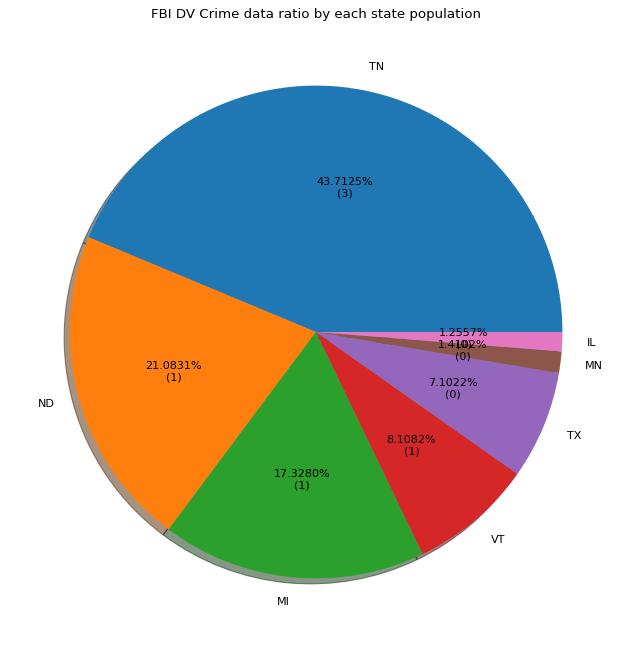

In [28]:
from matplotlib import cm
from matplotlib.pyplot import figure
# with resizing
figure(figsize=(12, 10), dpi=80)

def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)


state_info_fbi = melted_df_fbi.groupby(['state_abbrv'])['value'].sum()
state_info_fbi = state_info_fbi.sort_values(ascending=False)
total = len(state_info_fbi)

# Create a pieplot
plt.pie(state_info_fbi, labels=state_info_fbi.index, autopct=my_fmt, shadow=True)
plt.title("FBI DV Crime data ratio by each state population")
#plot_colortable(mcolors.TABLEAU_COLORS, sort_colors=False, emptycols=2)
plt.show()

In [18]:
google_trends_searchs = ['domestic_violence_ratio', 'handgun_ratio', 'rape_ratio', 'abuse_ratio', 'sexual_violence_ratio']
melted_google_trends = pd.melt(new_df.reset_index(), id_vars=['index', 'state_abbrv', 'year'], value_vars=google_trends_searchs)
melted_google_trends

,index,state_abbrv,year,variable,value
0,0,TX,2004,domestic_violence_ratio,0.0
1,1,TX,2005,domestic_violence_ratio,0.0
2,18,IL,2004,domestic_violence_ratio,0.0
3,19,IL,2005,domestic_violence_ratio,0.0
4,36,ND,2004,domestic_violence_ratio,0.0
...,...,...,...,...,...
625,121,VT,2017,sexual_violence_ratio,0.0
626,122,VT,2018,sexual_violence_ratio,0.0
627,123,VT,2019,sexual_violence_ratio,0.0
628,124,VT,2020,sexual_violence_ratio,0.0


In [19]:
melted_google_trends['value'] = melted_google_trends['value'].astype(float)

57.85081386566162
21.093560755252838
7.066640257835388
6.1316583305597305
3.6246225237846375
2.7138100937008858
1.5188872814178467


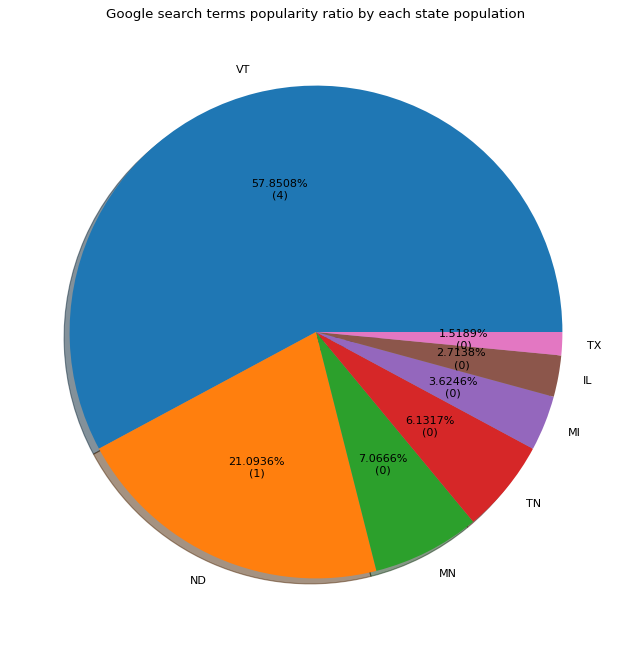

In [29]:
state_info_google_trends = melted_google_trends.groupby(['state_abbrv'])['value'].mean()
state_info_google_trends = state_info_google_trends.sort_values(ascending=False)
total = len(state_info_google_trends)
figure(figsize=(12, 10), dpi=80)
# Create a pieplot
plt.pie(state_info_google_trends, labels=state_info_google_trends.index, autopct=my_fmt, shadow=True)
plt.title("Google search terms popularity ratio by each state population")
plt.show()

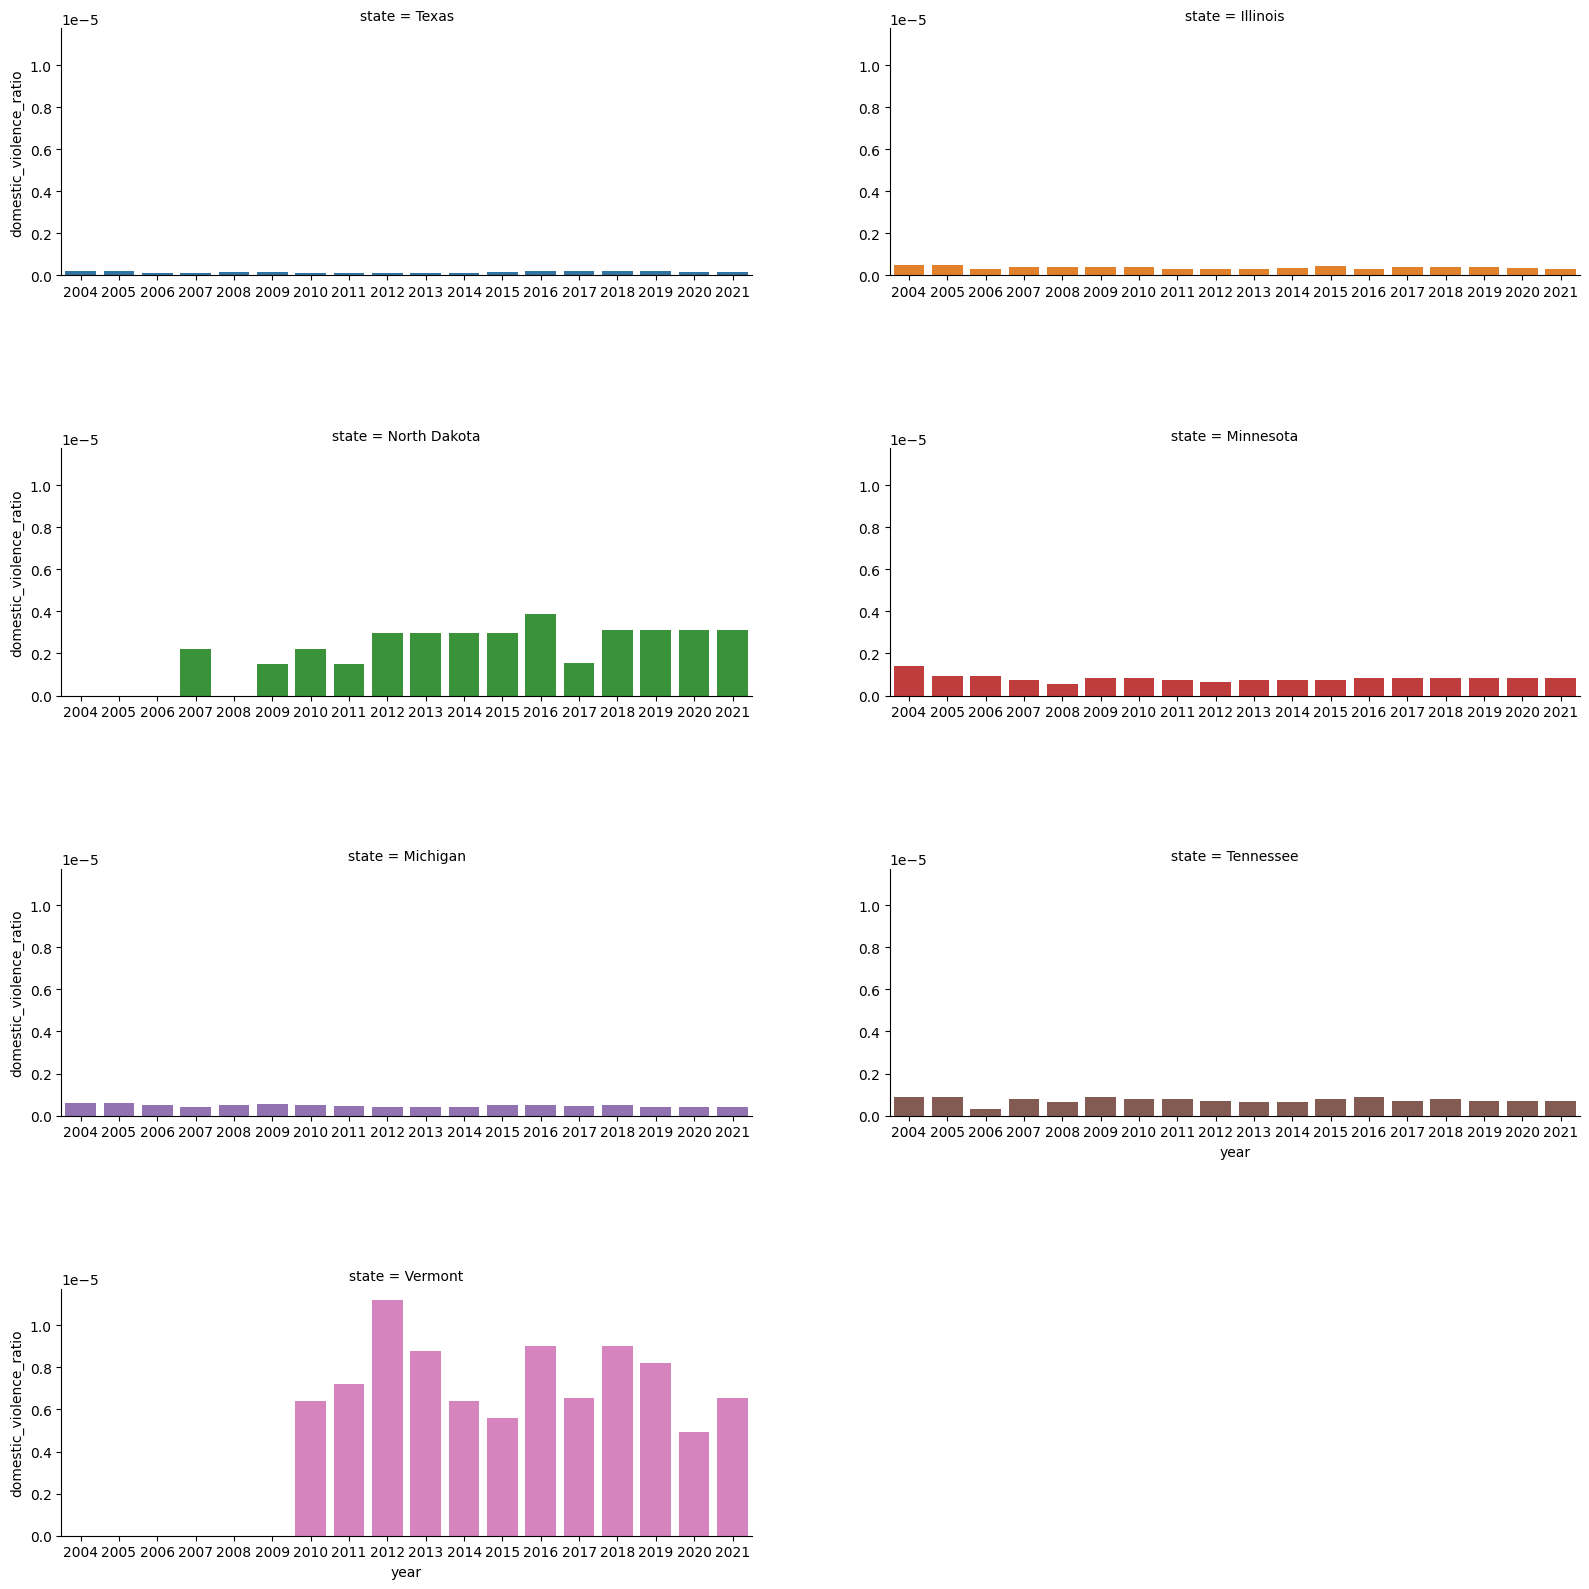

In [21]:
g = sns.FacetGrid(new_df, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")

# Make the plot
g = g.map_dataframe(sns.barplot, "year", "domestic_violence_ratio")
   




# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dbf2a01f-3e99-4593-9faf-0399a8afaf03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>